In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from keras.utils import image_dataset_from_directory

In [5]:
train=image_dataset_from_directory(
    'J:\\data_science\\deep learning files\\Covid19-dataset\\Covid19-dataset\\train',color_mode='grayscale')
test=image_dataset_from_directory(
    'J:\\data_science\\deep learning files\\Covid19-dataset\\Covid19-dataset\\test',color_mode='grayscale')


Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPool2D,Rescaling

In [11]:
model=Sequential([

         Rescaling(1/255,input_shape=(256,256,1)),
        Conv2D(32,kernel_size=(3,3),activation='relu'),
        MaxPool2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(3,activation='softmax')


])

F:\anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 516128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │     264,258,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 264,259,907 (1008.07 MB)

 Trainable params: 264,259,907 (1008.07 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.fit(train,validation_data=test,epochs=10)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 18s 2s/step - accuracy: 0.3926 - loss: 36.5332 - val_accuracy: 0.3485 - val_loss: 20.5200
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.6467 - loss: 7.9567 - val_accuracy: 0.7879 - val_loss: 4.0025
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8852 - loss: 1.4615 - val_accuracy: 0.6515 - val_loss: 4.8819
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.8905 - loss: 1.2037 - val_accuracy: 0.7273 - val_loss: 3.2791
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9157 - loss: 0.9303 - val_accuracy: 0.7424 - val_loss: 1.8573
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9672 - loss: 0.3363 - val_accuracy: 0.8939 - val_loss: 1.1476
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9897 - loss: 0.0422 - val_accuracy: 0.8333 - val_loss: 1.1188
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.9816 - loss: 0.0513 - val_accuracy: 0.8788 - val_loss: 1.1022
Epoch 

In [19]:
import cv2

In [31]:
img=cv2.imread('J:\\data_science\\deep learning files\\Covid19-dataset\\Covid19-dataset\\test/covid/094.png',cv2.IMREAD_GRAYSCALE)
img.shape

(391, 436)

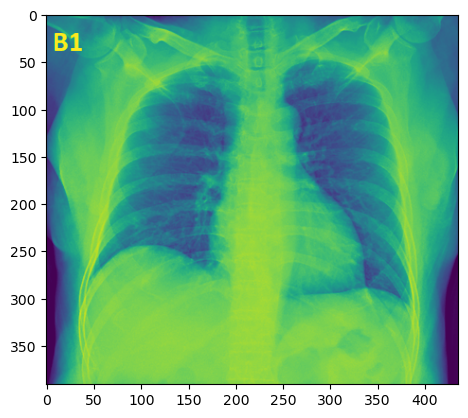

In [33]:
plt.imshow(img)

In [35]:
img=cv2.resize(img,(256,256))
img.shape

(256, 256)

In [37]:
img=np.expand_dims(img,axis=-1)
img=np.expand_dims(img,axis=0)
img.shape


(1, 256, 256, 1)

In [39]:
prob=model.predict(img)
prob

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step


array([[1.000000e+00, 3.761930e-15, 7.031271e-14]], dtype=float32)

In [41]:
index=np.argmax(prob)
index

0

In [43]:
train.class_names

['Covid', 'Normal', 'Viral Pneumonia']

In [45]:
train.class_names[index]

'Covid'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


'Viral Pneumonia'

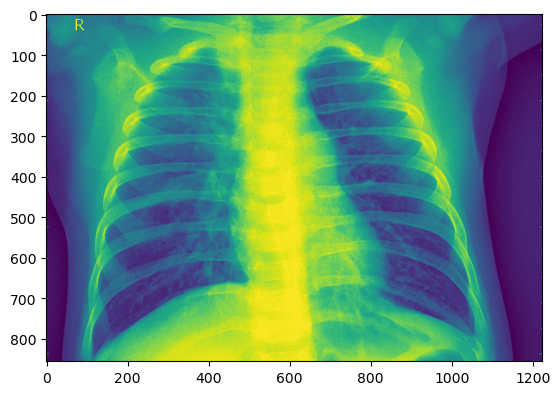

In [55]:
img=cv2.imread('J:\\data_science\\deep learning files\\Covid19-dataset\\Covid19-dataset\\test/Viral Pneumonia/0120.jpeg',cv2.IMREAD_GRAYSCALE)

plt.imshow(img)
img=cv2.resize(img,(256,256))

img=np.expand_dims(img,axis=-1)
img=np.expand_dims(img,axis=0)


prob=model.predict(img)

index=np.argmax(prob)

train.class_names[index]

In [57]:
model=Sequential([

         Rescaling(1/255,input_shape=(256,256,1)),
        Conv2D(32,kernel_size=(3,3),activation='relu',padding='same'),
        MaxPool2D(),
        Flatten(),
        Dense(512,activation='relu'),
        Dense(3,activation='softmax')


])

F:\anaconda\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [59]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 256, 256, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 524288)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │     268,435,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 268,437,827 (1.00 GB)

 Trainable params: 268,437,827 (1.00 GB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.save('f:/modelx.h5')

In [63]:
from keras.models import load_model

In [65]:
model=load_model('f:/modelx.h5')
model

<Sequential name=sequential_1, built=True>

In [69]:
s='this is python...,  ;  in a you are  you won a prize '   #article, preposition = stop words   puncuations  
s.split()

['this', 'is', 'python...,', ';']

In [71]:
import nltk

In [73]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Malay\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [75]:
from nltk.corpus import stopwords

In [85]:
stop=stopwords.words('english')
stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [87]:
s

'this is python...,  ;  '

In [97]:
s='this is python...,;  in a you are  you won a prize ' 

In [91]:
#tokenize

In [93]:
from nltk.tokenize import word_tokenize,sent_tokenize

In [101]:
tokens=word_tokenize(s)
tokens

['this',
 'is',
 'python',
 '...',
 ',',
 ';',
 'in',
 'a',
 'you',
 'are',
 'you',
 'won',
 'a',
 'prize']

In [105]:
stop_word_cleaned= [i for i in  tokens if i not in stop]
stop_word_cleaned

['python', '...', ',', ';', 'prize']

In [107]:
import string

In [109]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [111]:
[i for i in stop_word_cleaned if i not in string.punctuation]

['python', '...', 'prize']

In [115]:
#steming and lemmatization

In [117]:
# gone, went, going    storing ==>   root form go
# cats, dogs  
# nicely 
#stem  root form   stori    but  not meaningful always
#lemmatize  = > meaningful root form

In [119]:
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [121]:
lem=WordNetLemmatizer()

In [133]:
s=['this','going','cats','went','gone','nicely']
[lem.lemmatize(i,pos='v') for i in s ]

['this', 'go', 'cat', 'go', 'go', 'nicely']

In [135]:
#email spam or ham